In [1]:
import numpy as np

### Задача 1
Даны значения величины заработной платы заемщиков банка (salary) и значения их поведенческого кредитного скоринга (scoring):

salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]

scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]

Возьмём в качестве признака значение salary, а в качестве целевой переменной - scoring.
1. Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии, а затем с помощью метода наименьших квадратов.
2. Постройте scatter plot по данным и отметьте на нём прямую линейной регрессии, полученную в п. 1.
3. Посчитайте коэффициент детерминации, среднюю ошибку аппроксимации.
4. Оцените построенное уравнение регрессии с помощью F-критерия Фишера.
5. Постройте для коэффициентов регрессии доверительные интервалы с помощью t-статистики Стьюдента.

### Решение
1. Частный случай линейной регресси - это парная регрессия. Ее формула выглядит следующм образом: $y = b_0 + b_1 x_1$. А коэффициенты находятся следующим образом: $$b_1 = \frac{\overline{yx} - \overline{y} \cdot {\overline{x}}}{\overline{x^2} - (\overline{x})^2}, \:\: b_0 = \overline{y} - b_1 \cdot {\overline{x}}.$$
Найдем коэффициенты линейной регрессии по этим формулам.

In [2]:
x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

b1 = (np.mean(x * y) - np.mean(x) * np.mean(y)) / (np.mean(x ** 2) - np.mean(x) ** 2)
b0 = np.mean(y) - b1 * np.mean(x)
b0, b1

(444.1773573243596, 2.620538882402765)

Теперь найдем коэффициенты линейной регрессии методом наименьших квадратов.
Для этого составим матрицу признаков, добавив туда столбец со значением 1 и индексом 0. Затем посчитаем коэффициенты по формуле $b = (X^\top X)^{-1} X^\top y.$

In [3]:
ones = np.ones((x.shape[0], 1))
x_sqr = np.hstack((ones, x.reshape(-1, 1)))
x_sqr

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [4]:
y_sqr = y.reshape(-1, 1)
y_sqr

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

Найдем определитель матрицы $X^\top X$ что бы посмотреть насколько он близок к нулю чтобы избежать неустойчивости при вычислении обратной матрицы.

In [5]:
XTX = x_sqr.T.dot(x_sqr)

np.linalg.det(XTX)

349464.00000000023

Определитель намного больше 0. Запишем аналитическое решение.

In [6]:
XTX_inv = np.linalg.inv(XTX)

b = XTX_inv.dot(x_sqr.T).dot(y_sqr)
b

array([[444.17735732],
       [  2.62053888]])

Коэффициенты линейной регрессии, посчитанные двумя способами, равны.

2. Построим график линейной регрессии и отметим исходные данные

In [7]:
from matplotlib import pyplot as plt

Text(0, 0.5, 'scoring')

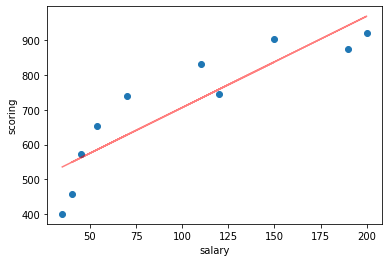

In [8]:
ox = x
oy = b0 + b1 * ox

plt.scatter(x, y)
plt.plot(ox, oy, color='red', alpha=0.5)
plt.xlabel('salary')
plt.ylabel('scoring')

3. Посчитаем коэффициент детерминации и среднюю ошибку аппроксимации.

Для этого посчитаем предсказанные значения скорингового балла по данным из зарплат и посчитанных выше коэффициентов линейной регрессии. Коэффициент детерминации имеет в общем виде следующую формулу: $R^2 = \dfrac{D_{model}}{D_y}$

In [9]:
z = b0 + b1 * x

print(f'real: {y[:5]}')
print(f'pred: {z[:5]}')

real: [401 574 874 919 459]
pred: [535.89621821 562.10160703 942.07974498 968.2851338  548.99891262]


In [10]:
R2 = z.var() / y.var()
R2

0.7876386635293678

Средняя ошибка аппроксимации вычисляется по формуле: $\overline{A} = \frac{1}{n} \displaystyle\sum_{i=1}^{n} \Bigl| {{\frac{y_i - z_i}{y_i}} \Bigr|}.$

In [11]:
a_mean = np.abs((y - z) / y).mean()
a_mean

0.11469251843561709

4. F-критерий Фишера используется для оценки статистической значимости уравнения линейной регрессии и имеет формулу $T = \dfrac{R^2}{1 - R^2} \cdot \dfrac{n - k - 1}{k}$

R2 мы считали ранее, k1=1, k2=8. Подставим все в формулу.

In [12]:
k1 = 1
k2 = 8

T = (R2 / (1 - R2)) * (k2 / k1)
T

29.67164085966437

Возьмем уровень значимости $\alpha = 0.05$ и посчитаем критическое значение $F_{crit} = F(1, 8)$

In [13]:
from scipy import stats

In [14]:
alpha = 0.05
F_crit = stats.f.ppf(1 - alpha, k1, k2)
F_crit

5.317655071578714

Т.к. $T > F_{crit}$, то уравнение линейной регресси статистически значимо.

5. Построим для коэффициентов регрессии доверительные интервалы с помощью t-статистики Стьюдента.

Сначала построим доверительный интервал для коэффициента $b_0$. Для этого найдем стандартную ошибку коэффициента наклона $S_{slope} = \sqrt{\dfrac{\frac{1}{n - 2} \displaystyle\sum_{i=1}^{n}(y_i - z_i)^2}{\displaystyle\sum_{i=1}^n (x_i - \overline{x})^2}}.$ Значение статистики будет $T = \dfrac{\hat{b}_1 - b_1}{S_{slope}}$, где $\hat{b}_1$ расчетный коэффициент наклона, а $b_1$ - реальный. Требуемый нам уроень доверия можно записать следуюзей формулой: $P \left( \hat{b}_1 - t_{1 - \alpha/2, \: n - 2} \cdot S_{slope} \leq b_1 \leq \hat{b}_1 + t_{1 - \alpha/2, \: n - 2} \cdot S_{slope} \right) = p$

In [15]:
def standard_error_slope(x, y, z):
    n = x.shape[0]
    upper = ((y - z) ** 2).sum() / (n - 2)
    lower = ((x - x.mean()) ** 2).sum()
    return np.sqrt(upper / lower)

In [16]:
s_slope = standard_error_slope(x, y, z)
s_slope

0.48108279568516005

Возьмем $\alpha = 0.05$ и посчитаем квантиль $t_{1 - \alpha/2, \: n - 2}$.

In [17]:
n = x.shape[0]
t = stats.t.ppf(1- alpha / 2, df = n - 2)
t

2.3060041350333704

Доверительный интервал для параметра $b_1$ будет равен:

In [18]:
(b1 - t * s_slope, b1 + t *  s_slope)

(1.5111599662593718, 3.729917798546158)

Для коэффициента $b_0$ нам надо посчитать стандартную ошибку коэффициента сдвига: $S_{intercept} = S_{slope} \cdot \sqrt{\dfrac{1}{n} \displaystyle\sum_{i=1}^n x_i^2}.$

In [19]:
def standard_error_intercept(x, y, z):
    return standard_error_slope(x, y, z) * np.sqrt((x ** 2).mean())

In [20]:
s_intercept = standard_error_intercept(x, y, z)
s_intercept

56.46649755068153

Доверительный интервал для $b_0$ будет:

In [21]:
(b0 - t * s_intercept, b0 + t * s_intercept)

(313.9653804816363, 574.3893341670829)

### Задача 2
Посчитать коэффициенты линейной регрессии для т.н. Квартета Энскомба.

Загрузим датасет.

In [22]:
import pandas as pd

anscombe_dataset = pd.read_csv('anscombe_dataset.csv', index_col='id')

anscombe_dataset

,x1,y1,x2,y2,x3,y3,x4,y4
id,,,,,,,,
0,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
1,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
2,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
3,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
4,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
5,14.0,9.96,14.0,8.10,14.0,8.84,8.0,7.04
6,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
7,4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50
8,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56


Для каждой пары $x_i, y_i$ найдем коэффициенты $b_{0i}, b_{1i}$

In [23]:
for i in range(1, 5):
    x = anscombe_dataset[f'x{i}'].values
    y = anscombe_dataset[f'y{i}'].values
    b1 = ((x * y).mean() - x.mean() * y.mean()) / ((x ** 2).mean() - x.mean() ** 2)
    b0 = y.mean() - b1 * x.mean()
    print(b0, b1)

3.0000909090909245 0.5000909090909076
3.0009090909090768 0.5000000000000014
3.0024545454545555 0.4997272727272716
3.0017272727272726 0.49990909090909097


Видим что для каждого из набора, входящего в Квартет Энскомба, коэффициенты линейной регрессии $b_0$ и $b_1$ примерно равны.